In [1]:
import csv
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')
submission = pd.read_csv("submission.csv")

In [2]:
train.head()

,Time,NX1,NX2,NX3,NX4,NX5,NX6,NX7,NX8,NX9,...,NX1291,NX1292,NX1293,NX1294,NX1295,NX1296,NX1297,NX1298,NX1299,NX1300
0,2016-07-26 11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-26 12:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-26 13:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-26 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-26 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
test.head()

,Time,NX1301,NX1302,NX1303,NX1304,NX1305,NX1306,NX1307,NX1308,NX1309,...,NX1491,NX1492,NX1493,NX1494,NX1495,NX1496,NX1497,NX1498,NX1499,NX1500
0,2017.7.1 0:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.275,0.021,NaN
1,2017.7.1 1:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.222,0.021,NaN
2,2017.7.1 2:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.237,0.021,NaN
3,2017.7.1 3:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229,0.020,NaN
4,2017.7.1 4:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.202,0.021,NaN


In [4]:
print(train.shape)
print(test.shape)
print(submission.shape)

(16909, 1301)
(8760, 201)
(200, 40)


In [5]:
train['Time']

0        2016-07-26 11:00
1        2016-07-26 12:00
2        2016-07-26 13:00
3        2016-07-26 14:00
4        2016-07-26 15:00
               ...       
16904    2018-06-30 19:00
16905    2018-06-30 20:00
16906    2018-06-30 21:00
16907    2018-06-30 22:00
16908    2018-06-30 23:00
Name: Time, Length: 16909, dtype: object

In [6]:
#시계열 데이터 분석을 위해서 데이터를 시계열 데이터에 맞게 포메팅 해준다.

train['Time'] = pd.to_datetime(train['Time'], format='%Y-%m-%d %H:%M', errors='raise')

In [33]:
# 컬럼 정보 리스트에 저장
cols = train.columns
cols_2 = train.columns
# 컬럼 별 평균 값 담기 위한 딕셔너리
train_mean = {}

x=[]
y=[]
for i in cols[1:-4]:
    print(str(i) + '의 평균 전력 수요량 :' , train[i].mean())
    train_mean[i] = train[i].mean()
    if train[i].mean() != 'nan':
        x.append(i)
        y.append(train[i].mean())

NX1의 평균 전력 수요량 : 0.3715058746736293
NX2의 평균 전력 수요량 : 0.41057063621533446
NX3의 평균 전력 수요량 : 0.5198773429792832
NX4의 평균 전력 수요량 : 0.2603629407850965
NX5의 평균 전력 수요량 : nan
NX6의 평균 전력 수요량 : 0.26832456428806317
NX7의 평균 전력 수요량 : 0.3780173646578141
NX8의 평균 전력 수요량 : 0.42461384514435696
NX9의 평균 전력 수요량 : 0.30213838120104436
NX10의 평균 전력 수요량 : 0.2731005878510777
NX11의 평균 전력 수요량 : 0.18452248775419328
NX12의 평균 전력 수요량 : 0.2631933484504913
NX13의 평균 전력 수요량 : 0.45661924959216965
NX14의 평균 전력 수요량 : 0.3600880913539968
NX15의 평균 전력 수요량 : 0.5197777053455019
NX16의 평균 전력 수요량 : 0.3840776762402089
NX17의 평균 전력 수요량 : 0.3762578328981724
NX18의 평균 전력 수요량 : 0.43006254158349966
NX19의 평균 전력 수요량 : 0.4100176412936949
NX20의 평균 전력 수요량 : 0.5150606660072535
NX21의 평균 전력 수요량 : 0.33805951989477145
NX22의 평균 전력 수요량 : 0.33506359065365277
NX23의 평균 전력 수요량 : 0.4534413315258322
NX24의 평균 전력 수요량 : 0.015136815920398013
NX25의 평균 전력 수요량 : 0.21918309399477812
NX26의 평균 전력 수요량 : 0.2960452607412266
NX27의 평균 전력 수요량 : 0.5144903119868637
NX28의 평균 전력 수

NX310의 평균 전력 수요량 : 0.28978289258896506
NX311의 평균 전력 수요량 : 0.5392139595564254
NX312의 평균 전력 수요량 : 0.4402895416397677
NX313의 평균 전력 수요량 : 0.20477594752186587
NX314의 평균 전력 수요량 : 0.34557420494699653
NX315의 평균 전력 수요량 : 0.3094042414355628
NX316의 평균 전력 수요량 : 0.3255236822568671
NX317의 평균 전력 수요량 : 0.3883411107459744
NX318의 평균 전력 수요량 : 0.3118906095551894
NX319의 평균 전력 수요량 : 0.3919408089444263
NX320의 평균 전력 수요량 : 0.4668490628082867
NX321의 평균 전력 수요량 : 0.262749343832021
NX322의 평균 전력 수요량 : 0.2661070496083551
NX323의 평균 전력 수요량 : 0.24919210351692106
NX324의 평균 전력 수요량 : 0.23348576934479692
NX325의 평균 전력 수요량 : 0.4478992601024474
NX326의 평균 전력 수요량 : 1.9415389869095045
NX327의 평균 전력 수요량 : 0.3006505709624796
NX328의 평균 전력 수요량 : 0.2581512953367876
NX329의 평균 전력 수요량 : 0.24602940302940302
NX330의 평균 전력 수요량 : 0.4834672104404568
NX331의 평균 전력 수요량 : 0.43867205638474305
NX332의 평균 전력 수요량 : 0.37585472636815925
NX333의 평균 전력 수요량 : 0.2975792440318302
NX334의 평균 전력 수요량 : 0.2714973701512163
NX335의 평균 전력 수요량 : 0.2963915047744485
NX336

NX606의 평균 전력 수요량 : 0.33930864600326266
NX607의 평균 전력 수요량 : 0.5354784893267651
NX608의 평균 전력 수요량 : 0.5275746110325318
NX609의 평균 전력 수요량 : 0.49496280587275693
NX610의 평균 전력 수요량 : 0.4275372062663186
NX611의 평균 전력 수요량 : 0.2752196475195823
NX612의 평균 전력 수요량 : 0.46552283105022835
NX613의 평균 전력 수요량 : 0.33370935158031934
NX614의 평균 전력 수요량 : 0.095
NX615의 평균 전력 수요량 : 0.3968039603960396
NX616의 평균 전력 수요량 : 0.5942136498516319
NX617의 평균 전력 수요량 : 0.3119662608185419
NX618의 평균 전력 수요량 : 0.2985245740498034
NX619의 평균 전력 수요량 : 0.4688528152782351
NX620의 평균 전력 수요량 : 0.5249657556799473
NX621의 평균 전력 수요량 : 0.4105928360170884
NX622의 평균 전력 수요량 : 0.3031298061123891
NX623의 평균 전력 수요량 : nan
NX624의 평균 전력 수요량 : 0.48055198425713347
NX625의 평균 전력 수요량 : 0.5455444991789818
NX626의 평균 전력 수요량 : 0.4670681892332789
NX627의 평균 전력 수요량 : 0.3956277324632953
NX628의 평균 전력 수요량 : 0.5317812602024159
NX629의 평균 전력 수요량 : 0.46852848205465925
NX630의 평균 전력 수요량 : 0.2391311637080868
NX631의 평균 전력 수요량 : 0.349457748776509
NX632의 평균 전력 수요량 : 0.55109876140808

NX913의 평균 전력 수요량 : 0.42245350734094617
NX914의 평균 전력 수요량 : 0.2640234551195309
NX915의 평균 전력 수요량 : 0.2640239894840618
NX916의 평균 전력 수요량 : nan
NX917의 평균 전력 수요량 : 0.4624957571801567
NX918의 평균 전력 수요량 : 0.48469778067885116
NX919의 평균 전력 수요량 : 0.6736094674556212
NX920의 평균 전력 수요량 : 0.37827744510978045
NX921의 평균 전력 수요량 : 0.39033201970443354
NX922의 평균 전력 수요량 : 0.327538209248934
NX923의 평균 전력 수요량 : 0.26275279421433273
NX924의 평균 전력 수요량 : 0.33035533333333333
NX925의 평균 전력 수요량 : 0.37488613376835234
NX926의 평균 전력 수요량 : 0.44493684210526324
NX927의 평균 전력 수요량 : 0.2792217105263158
NX928의 평균 전력 수요량 : 0.39975325945241197
NX929의 평균 전력 수요량 : 10.60385998861696
NX930의 평균 전력 수요량 : 0.37250880626223093
NX931의 평균 전력 수요량 : 0.20412263210368894
NX932의 평균 전력 수요량 : 0.340310650887574
NX933의 평균 전력 수요량 : 0.37992294096854007
NX934의 평균 전력 수요량 : 0.17935211683139105
NX935의 평균 전력 수요량 : 0.4082617817947063
NX936의 평균 전력 수요량 : 0.27274021703387047
NX937의 평균 전력 수요량 : 0.3365133724722766
NX938의 평균 전력 수요량 : 0.3710774669073406
NX939의 평균 전력 수요량

NX1127의 평균 전력 수요량 : 0.362387902695595
NX1128의 평균 전력 수요량 : 0.30061530350956467
NX1129의 평균 전력 수요량 : 0.534053947368421
NX1130의 평균 전력 수요량 : 0.4694996710526316
NX1131의 평균 전력 수요량 : 0.31448058727569334
NX1132의 평균 전력 수요량 : 0.5169888755261577
NX1133의 평균 전력 수요량 : 0.33119582245430806
NX1134의 평균 전력 수요량 : 0.3316636121785398
NX1135의 평균 전력 수요량 : 0.3809448613376835
NX1136의 평균 전력 수요량 : 0.4985278592375367
NX1137의 평균 전력 수요량 : 0.7242912685337727
NX1138의 평균 전력 수요량 : 0.5176050228310504
NX1139의 평균 전력 수요량 : 0.5441734872332984
NX1140의 평균 전력 수요량 : 0.5611919494344644
NX1141의 평균 전력 수요량 : 0.36144098457888496
NX1142의 평균 전력 수요량 : 0.2921124833110814
NX1143의 평균 전력 수요량 : 0.3413173298257153
NX1144의 평균 전력 수요량 : 0.5495223684210526
NX1145의 평균 전력 수요량 : 0.4120528031290743
NX1146의 평균 전력 수요량 : 0.20258195836545873
NX1147의 평균 전력 수요량 : 0.3739013482407103
NX1148의 평균 전력 수요량 : 0.15179402767662054
NX1149의 평균 전력 수요량 : 0.5971170991350632
NX1150의 평균 전력 수요량 : 2.4174537114261887
NX1151의 평균 전력 수요량 : 0.32330166270783844
NX1152의 평균 전력 수요량 : 

1296
1288


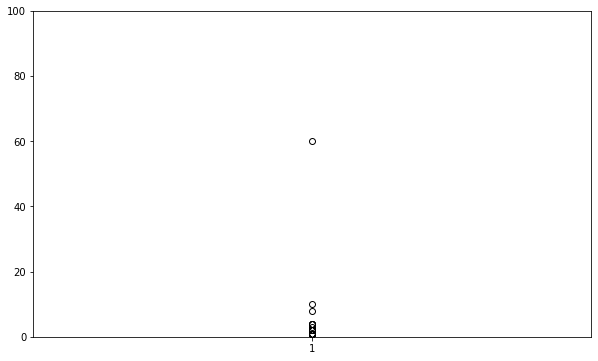

In [56]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]
z=[]

for i in y:
    try:
        z.append(int(i))
    except Exception:
        pass
print(len(y))
print(len(z))
plt.ylim([0,100])
plt.boxplot(z)
plt.show()



In [58]:
df = pd.DataFrame(y)

In [68]:
df.describe()


,0
count,1288.000000
mean,0.488115
std,1.748992
min,0.002000
25%,0.302884
50%,0.375148
75%,0.456142
max,60.396900


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1288 non-null   float64
dtypes: float64(1)
memory usage: 10.2 KB


In [ ]:
df.